# Stock Market Visualization

In [1]:
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import pandas

## Read the data from Stock folder

In [2]:
os.chdir('Data/Stocks/')
list = os.listdir()
number_files = len(list)
print(number_files)
filenames = ['amzn.us.txt', 'tsla.us.txt','ge.us.txt','gs.us.txt','wmt.us.txt']
print(filenames)

7201
['amzn.us.txt', 'tsla.us.txt', 'ge.us.txt', 'gs.us.txt', 'wmt.us.txt']


### Read data into dataframes

In [3]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)
data[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0,amzn
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0,amzn
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0,amzn
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0,amzn
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0,amzn


In [4]:
print(len(data))
TechIndicator = copy.deepcopy(data)

5


## Add various Technical Indicators in the dataframe

### Calculation of Relative Strength Index (RSI)
$$ RSI = 100 - \frac{100}{1+\frac{Average gain}{Average loss}}$$

In [5]:
# Relative Strength Index
def rsi_new(df, column="Close", period=14):
    delta = df[column].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    rUp = up.ewm(com=period - 1,  adjust=False).mean()
    rDown = down.ewm(com=period - 1, adjust=False).mean().abs()
    rsi = 100 - 100 / (1 + rUp / rDown)    
    return rsi

In [6]:
# Add Momentum_1D column (Momentum_1D = P(t) - P(t-1))
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = rsi_new(TechIndicator[stock]).fillna(0)
TechIndicator[1].tail(10)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D
1848,2017-10-30,319.18,323.780,317.25,320.08,4254378,0,tsla,-0.79,30.957434
1849,2017-10-31,320.23,331.950,320.18,331.53,5672347,0,tsla,11.45,41.699248
1850,2017-11-01,332.25,332.609,320.26,321.08,8457336,0,tsla,-10.45,36.168469
1851,2017-11-02,300.13,308.690,292.63,299.26,19791416,0,tsla,-21.82,27.859391
1852,2017-11-03,299.50,306.250,295.13,306.09,8893974,0,tsla,6.83,33.044519
1853,2017-11-06,307.00,307.500,299.01,302.78,6482486,0,tsla,-3.31,31.849767
1854,2017-11-07,301.02,306.500,300.03,306.05,5286320,0,tsla,3.27,34.374164
1855,2017-11-08,305.50,306.890,301.30,304.31,4725510,0,tsla,-1.74,33.659690
1856,2017-11-09,302.50,304.460,296.30,302.99,5440335,0,tsla,-1.32,33.097658
1857,2017-11-10,302.50,308.360,301.85,302.99,4621912,0,tsla,0.00,33.097658


### Calculation of Volume

In [7]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,amzn,9.06,75.958310,3331738
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,amzn,2.51,76.304545,2684443
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,amzn,9.71,77.645752,2576010
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0,amzn,-3.75,75.859923,3729978
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0,amzn,-3.78,74.012060,2179181


### Calculation of Bollinger Bands
$$ UpperBand = MovingAverage + 2*StandDeviation$$
$$ LowerBand = MovingAverage - 2*StandDeviation$$

In [8]:
def bbands(price, length=30):
    """ returns average, upper band, and lower band"""
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + 2*sd
    dnband = ave - 2*sd
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [9]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=20)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,amzn,9.06,75.958310,3331738,1030.142,1148.058,912.226
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,amzn,2.51,76.304545,2684443,1036.941,1159.999,913.882
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,amzn,9.71,77.645752,2576010,1043.835,1172.328,915.341
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0,amzn,-3.75,75.859923,3729978,1050.245,1182.463,918.026
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0,amzn,-3.78,74.012060,2179181,1056.365,1190.680,922.050


### Calculation of Aroon Oscillator
$$ Aroon Oscillator = Aroon Up − Aroon Down $$

$$ Aroon Up = 100 ∗ \frac{25 − periods since 25 period high}{25} $$

$$ Aroon Down = 100 ∗ \frac{25 − periods since 25 period low}{25} $$	

In [10]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [11]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = aroon(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list


## Drop unwanted columns

In [12]:
columns2Drop = ['Momentum_1D']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0,amzn,0.0,14700000,0.0,0.0,0.0,0.0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0,amzn,0.0,6106800,0.0,0.0,0.0,0.0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0,amzn,0.0,5467200,0.0,0.0,0.0,0.0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0,amzn,0.0,18853200,0.0,0.0,0.0,0.0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0,amzn,0.0,11776800,0.0,0.0,0.0,0.0


### Calculation of Stochastic Oscillator (%K and %D)
$$ K = \frac{RecentClosePrice - LowestPriceTradedForLast 14 days}{HighestPriceTradedForLast 14 days-LowestPriceTradedForLast 14 days} * 100$$

In [13]:
def STOK(df, n):
    df['STOK'] = ((df['Close'] - df['Low'].rolling(window=n).min()) / (df['High'].rolling(window=n).max() - df['Low'].rolling(window=n).min())) * 100
    df['STOD'] = df['STOK'].rolling(window = 3).mean()

In [14]:
for stock in range(len(TechIndicator)):
    STOK(TechIndicator[stock], 14)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,amzn,75.958310,3331738,1030.142,1148.058,912.226,76.0,97.084280,90.759746
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,amzn,76.304545,2684443,1036.941,1159.999,913.882,96.0,95.580012,95.227732
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,amzn,77.645752,2576010,1043.835,1172.328,915.341,96.0,98.462783,97.042358
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0,amzn,75.859923,3729978,1050.245,1182.463,918.026,48.0,96.295654,96.779483
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0,amzn,74.012060,2179181,1056.365,1190.680,922.050,48.0,94.024862,96.261100


### Calculation of Price Rate of Change
$$ ROC = \frac{Close - CloseNPeriodsAgo}{CloseNPeriodsAgo} * 100 $$

In [15]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['ROC'] = ((TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(12))/(TechIndicator[stock]['Close'].shift(12)))*100
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD,ROC
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,amzn,75.958310,3331738,1030.142,1148.058,912.226,76.0,97.084280,90.759746,13.586929
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,amzn,76.304545,2684443,1036.941,1159.999,913.882,96.0,95.580012,95.227732,14.269872
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,amzn,77.645752,2576010,1043.835,1172.328,915.341,96.0,98.462783,97.042358,17.238953
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0,amzn,75.859923,3729978,1050.245,1182.463,918.026,48.0,96.295654,96.779483,15.701404
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0,amzn,74.012060,2179181,1056.365,1190.680,922.050,48.0,94.024862,96.261100,15.668459


### Calculation of Volume Weighted Average Price
$$ VWAP = \frac{\sum{Price * Volume}}{\sum Volume}$$

In [16]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['VWAP'] = (TechIndicator[stock]['Volume'] * (TechIndicator[stock]['High'] + TechIndicator[stock]['Low'])/2) / TechIndicator[stock]['Volume']
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD,ROC,VWAP
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,amzn,75.958310,3331738,1030.142,1148.058,912.226,76.0,97.084280,90.759746,13.586929,1117.090
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,amzn,76.304545,2684443,1036.941,1159.999,913.882,96.0,95.580012,95.227732,14.269872,1124.050
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,amzn,77.645752,2576010,1043.835,1172.328,915.341,96.0,98.462783,97.042358,17.238953,1127.325
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0,amzn,75.859923,3729978,1050.245,1182.463,918.026,48.0,96.295654,96.779483,15.701404,1122.695
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0,amzn,74.012060,2179181,1056.365,1190.680,922.050,48.0,94.024862,96.261100,15.668459,1127.905


In [17]:
TechIndicator[1].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD,ROC,VWAP
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0,tsla,31.849767,6482486,335.620,374.737,296.504,-44.0,14.423760,14.324286,-13.936500,303.255
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0,tsla,34.374164,5286320,333.143,373.199,293.088,-44.0,20.800719,18.117316,-11.315561,303.265
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0,tsla,33.659690,4725510,330.629,371.322,289.936,-44.0,18.863049,18.029176,-9.705655,304.095
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0,tsla,33.097658,5440335,327.994,368.681,287.308,-44.0,18.073971,19.245913,-10.182605,300.380
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0,tsla,33.097658,4621912,325.365,365.338,285.393,-44.0,20.649791,19.195603,-7.012644,305.105


### Calculation of Momentum 
$$Momentum = Latest Price - Closing Price X Days Ago$$

In [18]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum'] = TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(10)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD,ROC,VWAP,Momentum
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,amzn,75.958310,3331738,1030.142,1148.058,912.226,76.0,97.084280,90.759746,13.586929,1117.090,154.36
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,amzn,76.304545,2684443,1036.941,1159.999,913.882,96.0,95.580012,95.227732,14.269872,1124.050,147.27
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,amzn,77.645752,2576010,1043.835,1172.328,915.341,96.0,98.462783,97.042358,17.238953,1127.325,159.97
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0,amzn,75.859923,3729978,1050.245,1182.463,918.026,48.0,96.295654,96.779483,15.701404,1122.695,156.70
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0,amzn,74.012060,2179181,1056.365,1190.680,922.050,48.0,94.024862,96.261100,15.668459,1127.905,24.40


### Calculation of Commodity Channel Index
$$ CCI = \frac{Typical Price - Moving Average}{.015* Mean Deviation}$$

In [19]:
def CCI(df, n, constant):
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    CCI = pd.Series((TP - TP.rolling(window=n, center=False).mean()) / (constant * TP.rolling(window=n, center=False).std()))
    return CCI

In [20]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['CCI'] = CCI(TechIndicator[stock], 20, 0.015)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD,ROC,VWAP,Momentum,CCI
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0,amzn,75.958310,3331738,1030.142,1148.058,912.226,76.0,97.084280,90.759746,13.586929,1117.090,154.36,104.532212
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0,amzn,76.304545,2684443,1036.941,1159.999,913.882,96.0,95.580012,95.227732,14.269872,1124.050,147.27,98.088509
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0,amzn,77.645752,2576010,1043.835,1172.328,915.341,96.0,98.462783,97.042358,17.238953,1127.325,159.97,92.608948
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0,amzn,75.859923,3729978,1050.245,1182.463,918.026,48.0,96.295654,96.779483,15.701404,1122.695,156.70,79.061052
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0,amzn,74.012060,2179181,1056.365,1190.680,922.050,48.0,94.024862,96.261100,15.668459,1127.905,24.40,73.415033


# Visualization of technical indicators

In [21]:
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD,ROC,VWAP,Momentum,CCI
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0,amzn,0.0,14700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.845,0.0,0.0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0,amzn,0.0,6106800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.695,0.0,0.0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0,amzn,0.0,5467200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.695,0.0,0.0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0,amzn,0.0,18853200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.515,0.0,0.0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0,amzn,0.0,11776800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.380,0.0,0.0


In [22]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [23]:
TechIndicator[1].head()

,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,STOK,STOD,ROC,VWAP,Momentum,CCI
Date,,,,,,,,,,,,,,,,,,,
2010-06-28,17.00,17.00,17.00,17.00,0,0,tsla,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2010-06-29,19.00,25.00,17.54,23.89,18783276,0,tsla,100.000000,18783276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.270,0.0,0.0
2010-06-30,25.79,30.42,23.30,23.83,17194394,0,tsla,99.933058,17194394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.860,0.0,0.0
2010-07-01,25.00,25.92,20.27,21.96,8229863,0,tsla,97.737059,8229863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.095,0.0,0.0
2010-07-02,23.00,23.10,18.71,19.20,5141807,0,tsla,94.438500,5141807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.905,0.0,0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


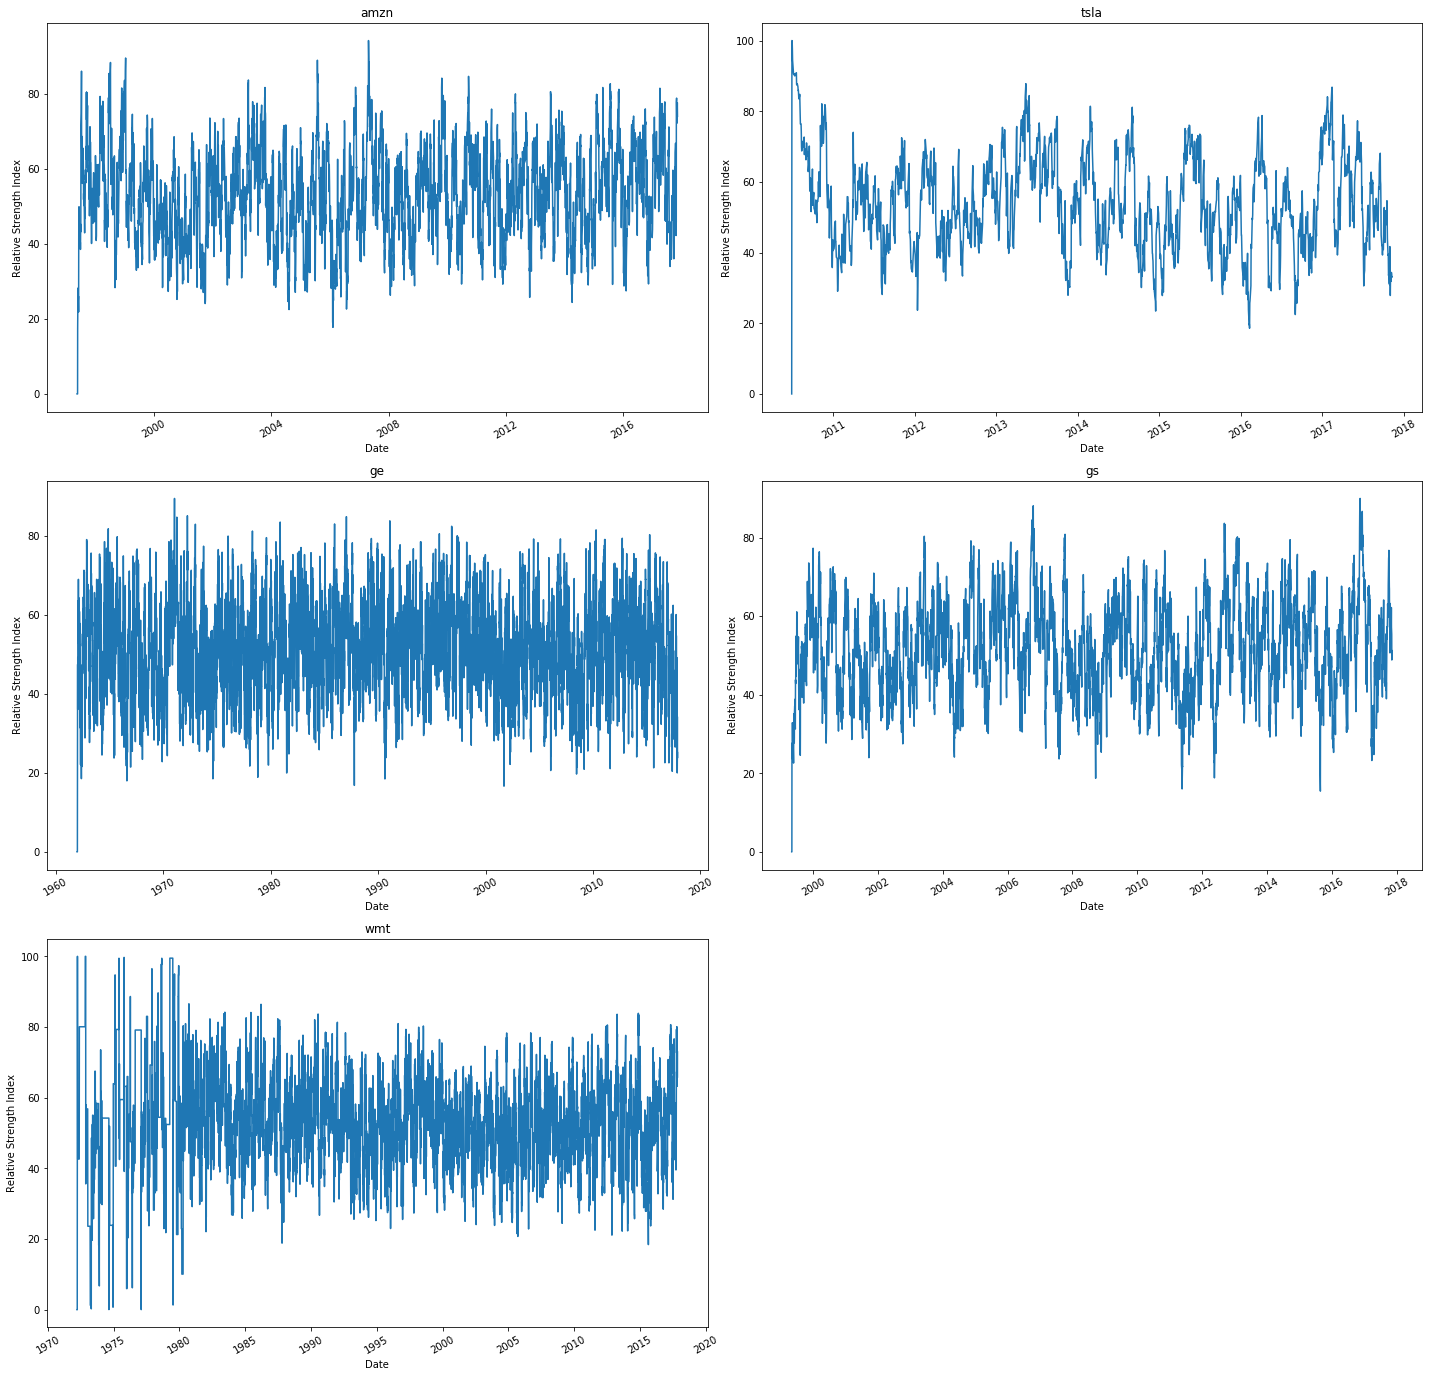

In [24]:
%matplotlib inline
# RSI Plot
fig = plt.figure(figsize=(20,25))
for i in range(5):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()

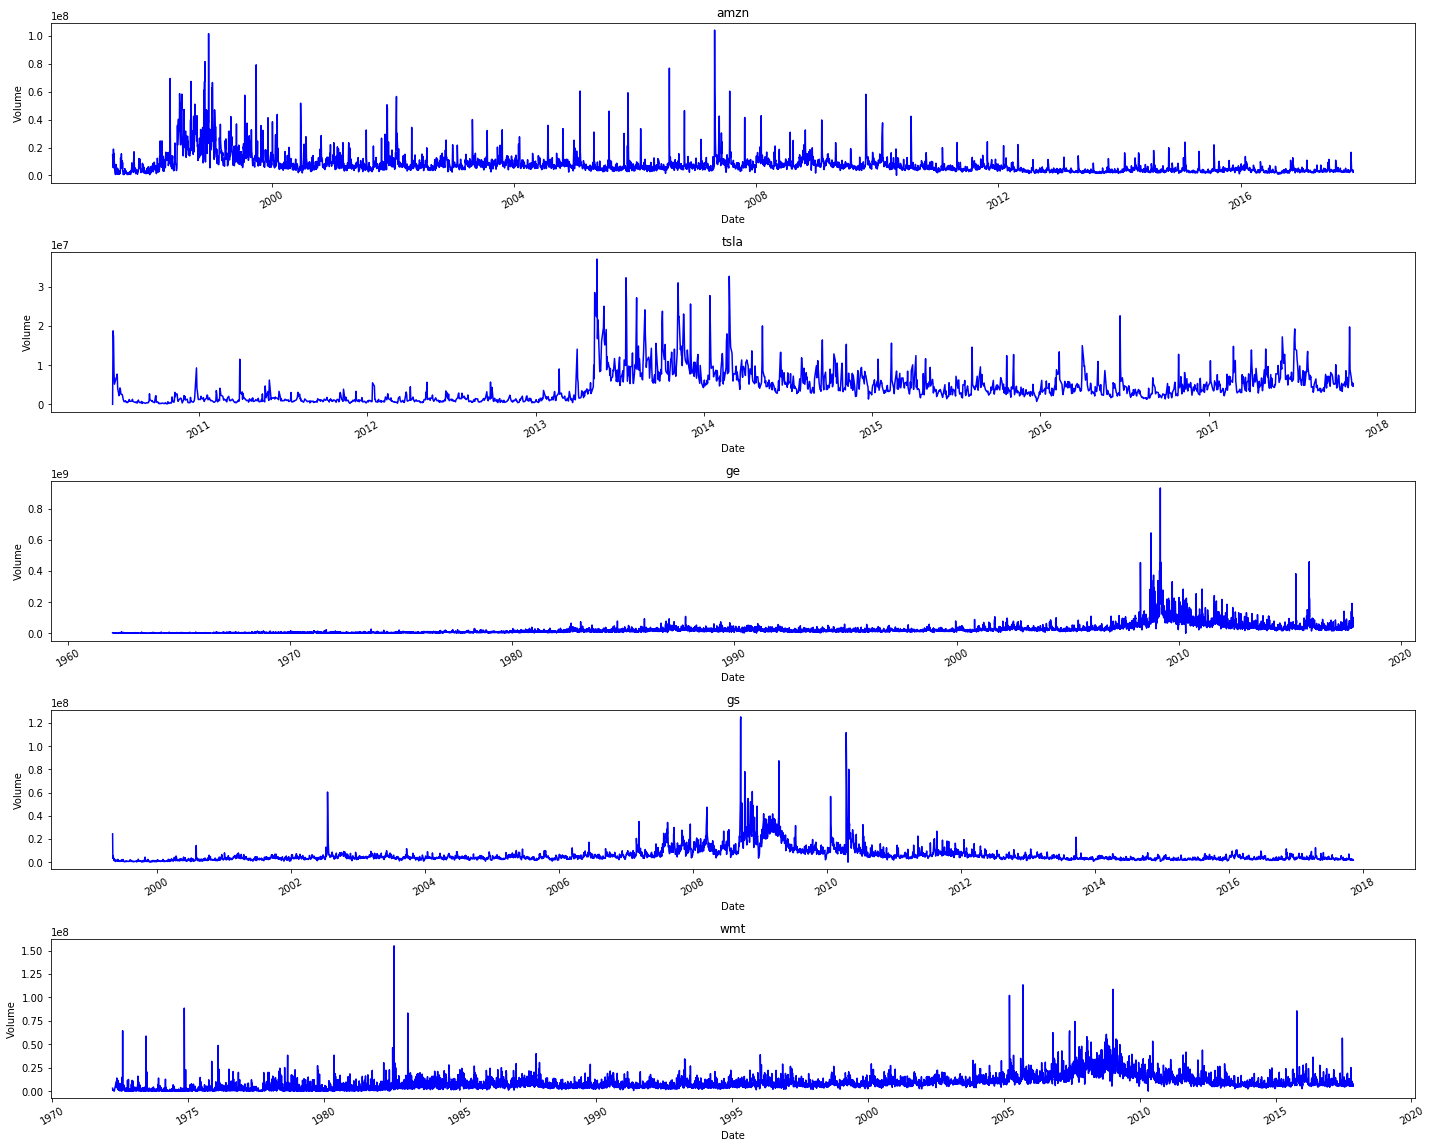

In [25]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(5):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

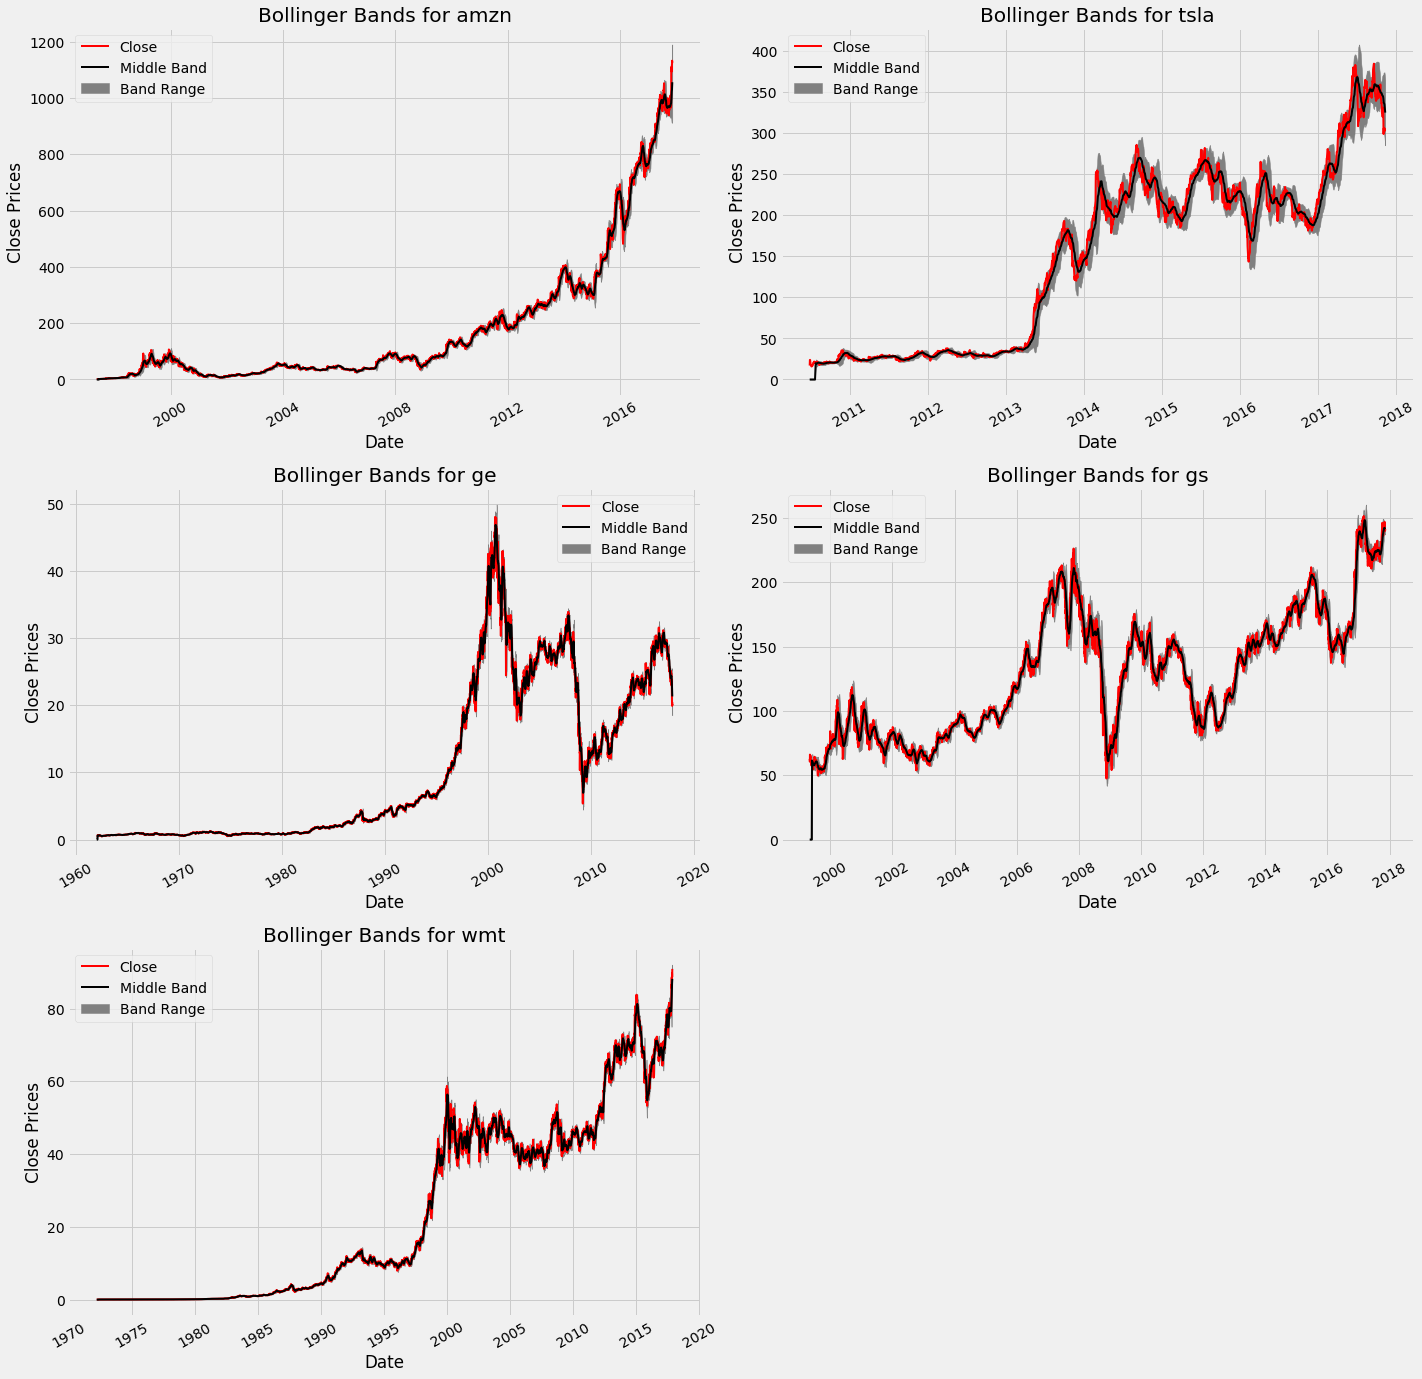

In [26]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(5):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()
#.dt.to_pydatetime()

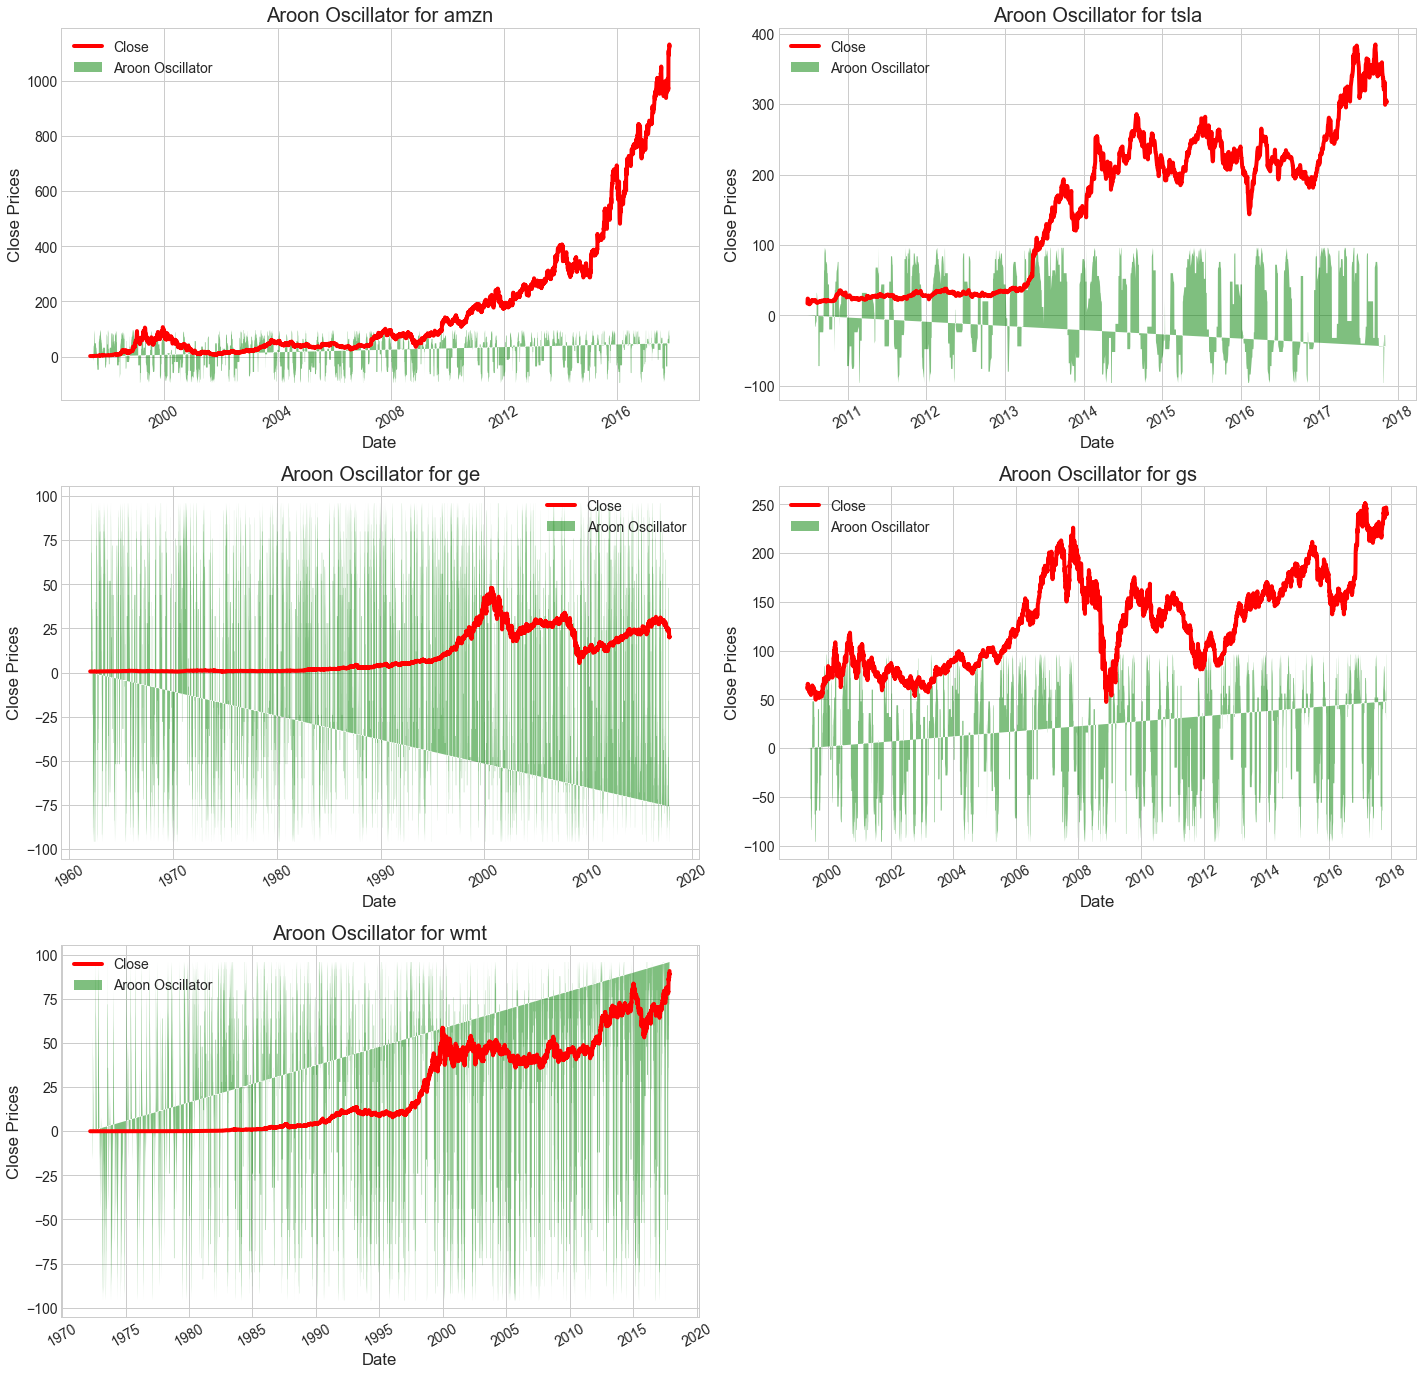

In [27]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(5):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

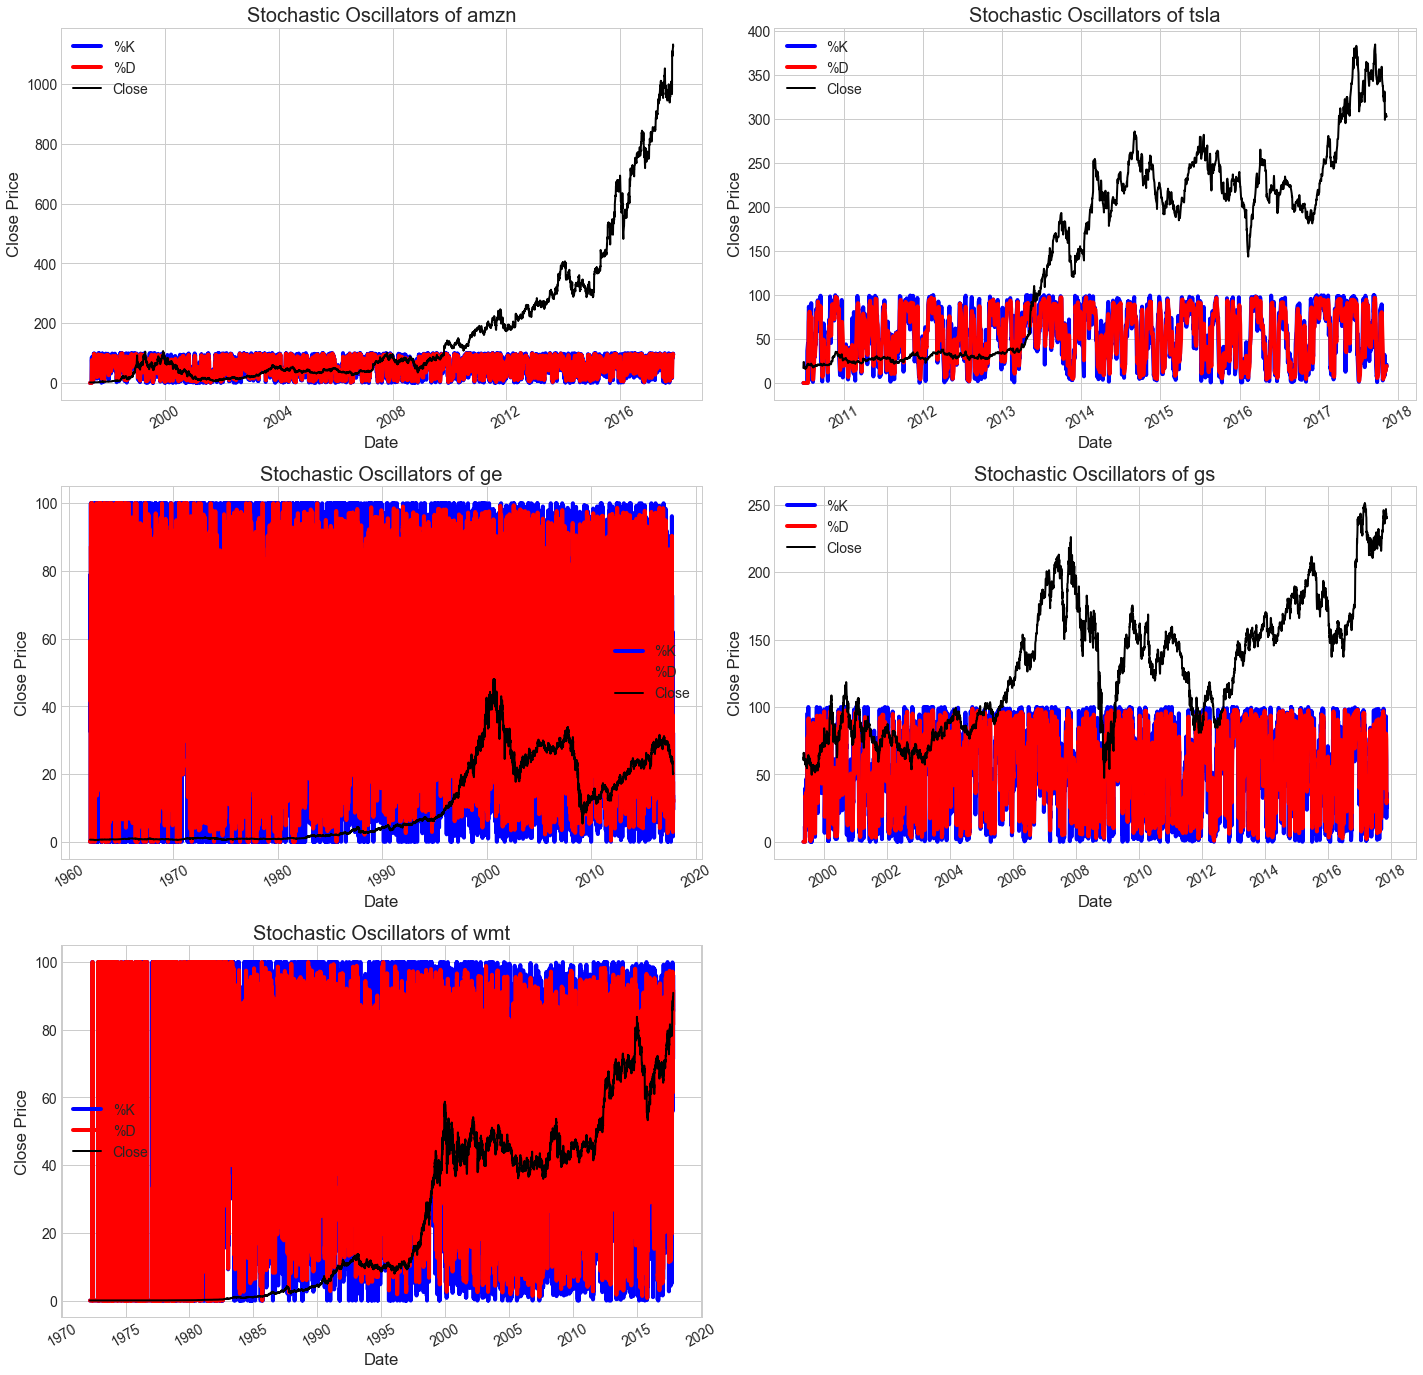

In [28]:
# Stochastic Oscillator plots
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(5):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['STOK'], 'blue', label="%K")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['STOD'], 'red', label="%D")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='black', lw=2, label = "Close")
    ax.set_title("Stochastic Oscillators of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.xticks(rotation=30)
fig.tight_layout()

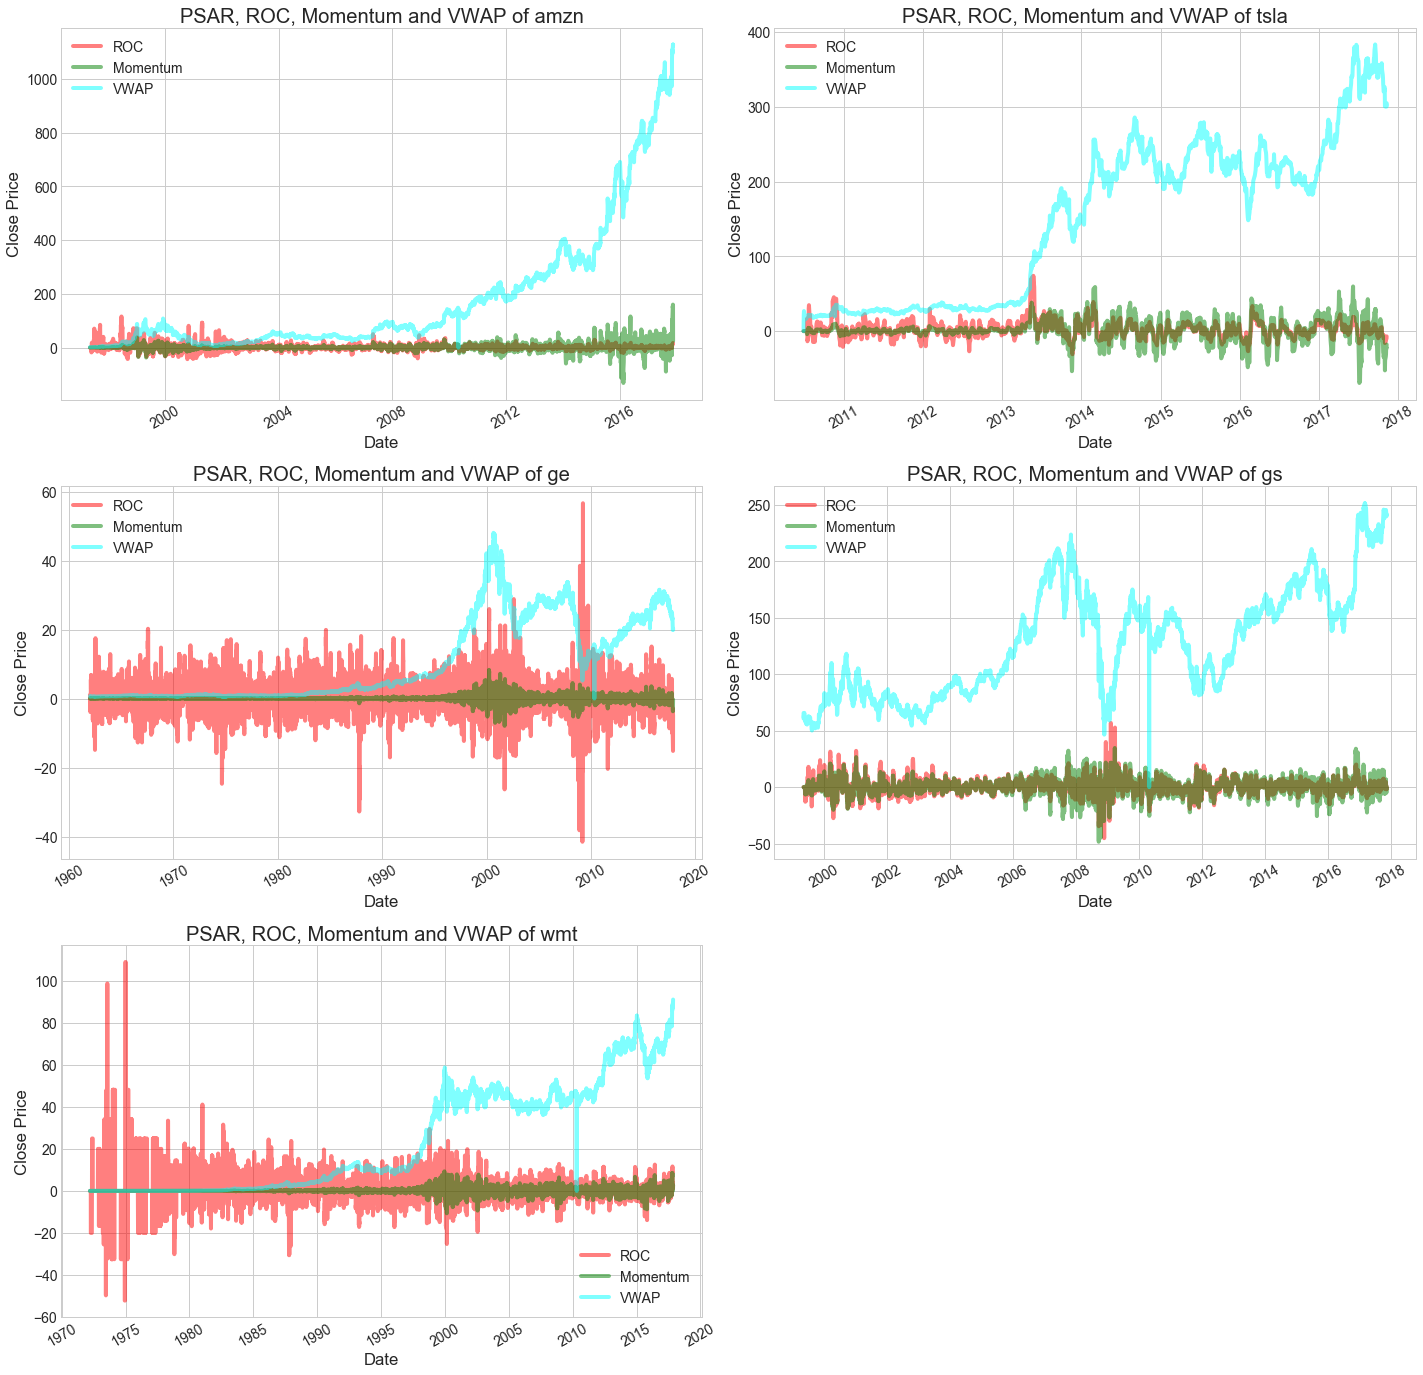

In [29]:
# Rate of Change, Momentum and VWAP Plots
fig = plt.figure(figsize=(20,25))
for i in range(5):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['ROC'], 'red', label="ROC", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Momentum'], 'green', label="Momentum", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['VWAP'], 'cyan', label="VWAP", alpha = 0.5)
    ax.set_title("PSAR, ROC, Momentum and VWAP of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.xticks(rotation=30)
fig.tight_layout()

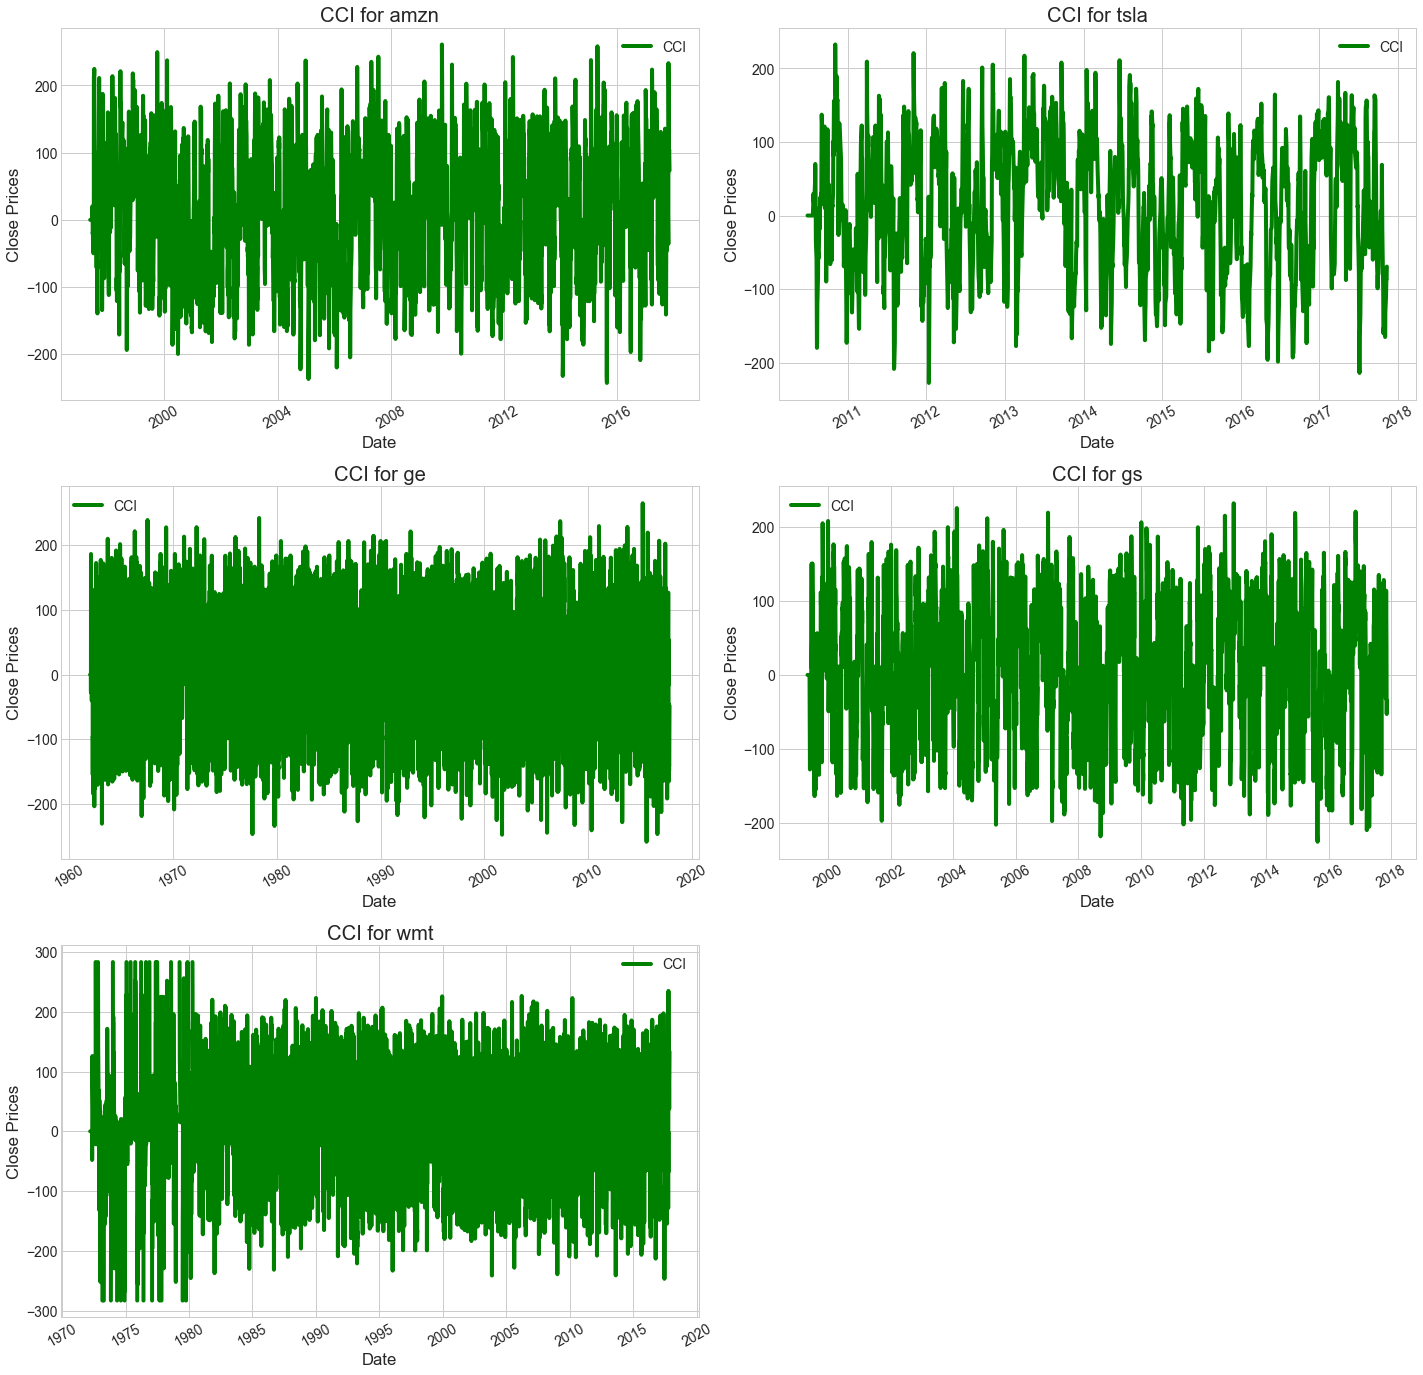

In [30]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(5):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['CCI'], 'green', label="CCI")
    ax.set_title("CCI for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()